<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/week_1/dstep23_slr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DSTEP23 // Sea Level Rise: Rudimentary Data Science Notebook**

*Aug 31, 2023*

This notebook will go through a bare-bones example of the Data Science process using global sea-level rise as a case study.

---

**PROBLEM DEFINITION**

- Question: what is the rate of average global sea level rise in mm/yr?
- Data required: sea level in mm

**DATA COLLECTION**

In [5]:
import pandas as pd

In [17]:
# -- set the filename
fname = "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_free_txj1j2_90.csv"

# -- read the csv into a DataFrame
#    (skip the first 5 rows which is the "header of the file")
data = pd.read_csv(fname, skiprows=5)

In [18]:
data

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3
0,1992.9614,-19.24,NaN,NaN,NaN
1,1992.9865,-19.65,NaN,NaN,NaN
2,1993.0123,-15.32,NaN,NaN,NaN
3,1993.0407,-19.12,NaN,NaN,NaN
4,1993.0660,-23.64,NaN,NaN,NaN
...,...,...,...,...,...
1349,2022.7463,NaN,NaN,NaN,76.13
1350,2022.7733,NaN,NaN,NaN,74.74
1351,2022.7992,NaN,NaN,NaN,73.83
1352,2022.8295,NaN,NaN,NaN,74.40


In [19]:
data["year"]

0       1992.9614
1       1992.9865
2       1993.0123
3       1993.0407
4       1993.0660
          ...    
1349    2022.7463
1350    2022.7733
1351    2022.7992
1352    2022.8295
1353    2022.8538
Name: year, Length: 1354, dtype: float64

**DATA PREPARATION**

In [20]:
cols = ["year", "TOPEX/Poseidon"]

In [21]:
data[cols]

,year,TOPEX/Poseidon
0,1992.9614,-19.24
1,1992.9865,-19.65
2,1993.0123,-15.32
3,1993.0407,-19.12
4,1993.0660,-23.64
...,...,...
1349,2022.7463,NaN
1350,2022.7733,NaN
1351,2022.7992,NaN
1352,2022.8295,NaN


In [22]:
# columns is an attribute of the pandas dataframe.
data.columns

Index(['year', 'TOPEX/Poseidon', 'Jason-1', 'Jason-2', 'Jason-3'], dtype='object')

In [24]:
data.columns[2]

'Jason-1'

In [27]:
# the :3 is non inclusive
data.columns[1:3]

Index(['TOPEX/Poseidon', 'Jason-1'], dtype='object')

In [28]:
cols = data.columns[1:5]
sub = data[cols]
type(sub)

pandas.core.frame.DataFrame

In [29]:
sub.columns

Index(['TOPEX/Poseidon', 'Jason-1', 'Jason-2', 'Jason-3'], dtype='object')

In [30]:
sub.min()

TOPEX/Poseidon   -26.93
Jason-1            0.86
Jason-2           20.02
Jason-3           48.38
dtype: float64

In [32]:
minlev = sub.min(axis=1)

In [33]:
data["minlev"] = minlev

In [34]:
data

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,minlev
0,1992.9614,-19.24,NaN,NaN,NaN,-19.24
1,1992.9865,-19.65,NaN,NaN,NaN,-19.65
2,1993.0123,-15.32,NaN,NaN,NaN,-15.32
3,1993.0407,-19.12,NaN,NaN,NaN,-19.12
4,1993.0660,-23.64,NaN,NaN,NaN,-23.64
...,...,...,...,...,...,...
1349,2022.7463,NaN,NaN,NaN,76.13,76.13
1350,2022.7733,NaN,NaN,NaN,74.74,74.74
1351,2022.7992,NaN,NaN,NaN,73.83,73.83
1352,2022.8295,NaN,NaN,NaN,74.40,74.40


<Axes: xlabel='year'>

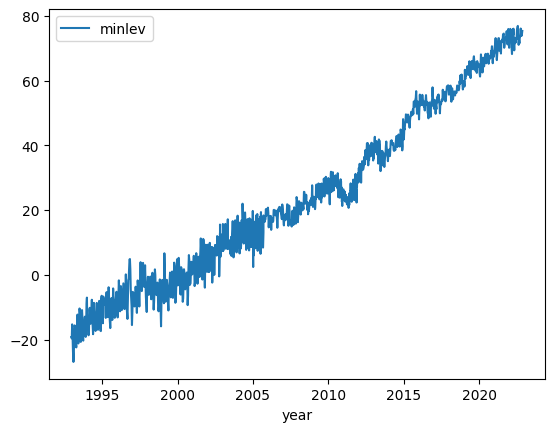

In [35]:
data.plot("year", "minlev")

<Axes: xlabel='year', ylabel='sea level relative to 2000 [mm]'>

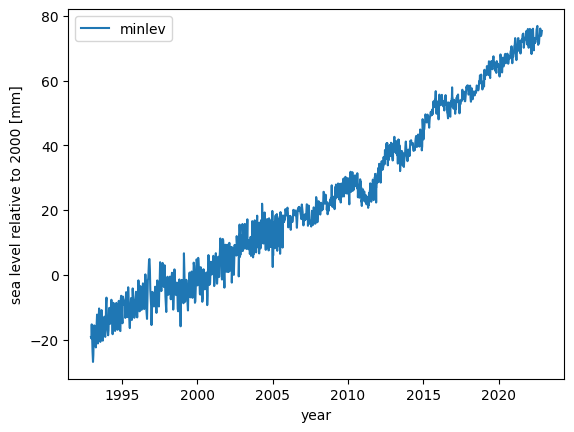

In [36]:
data.plot("year", "minlev", ylabel="sea level relative to 2000 [mm]")

**MACHINE LEARNING**

In [67]:
import numpy as np
params = np.polyfit(data["year"], data["minlev"], 1)
params_sq = np.polyfit(data["year"], data["minlev"], 2)

In [68]:
params

array([ 3.06458589e+00, -6.12992849e+03])

In [69]:
model = params[0] * data["year"] + params[1]
model_sq = params_sq[0] * data["year"]**2 + params_sq[1]*data["year"] + params_sq[2]

In [70]:
data["model"] = model
data["model_sq"] = model_sq

In [71]:
data

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,minlev,model,model_sq
0,1992.9614,-19.24,NaN,NaN,NaN,-19.24,-22.327101,-14.765509
1,1992.9865,-19.65,NaN,NaN,NaN,-19.65,-22.250180,-14.723352
2,1993.0123,-15.32,NaN,NaN,NaN,-15.32,-22.171114,-14.679959
3,1993.0407,-19.12,NaN,NaN,NaN,-19.12,-22.084080,-14.632122
4,1993.0660,-23.64,NaN,NaN,NaN,-23.64,-22.006546,-14.589445
...,...,...,...,...,...,...,...,...
1349,2022.7463,NaN,NaN,NaN,76.13,76.13,68.951283,76.079344
1350,2022.7733,NaN,NaN,NaN,74.74,74.74,69.034027,76.198763
1351,2022.7992,NaN,NaN,NaN,73.83,73.83,69.113400,76.313379
1352,2022.8295,NaN,NaN,NaN,74.40,74.40,69.206257,76.447546


<Axes: xlabel='year'>

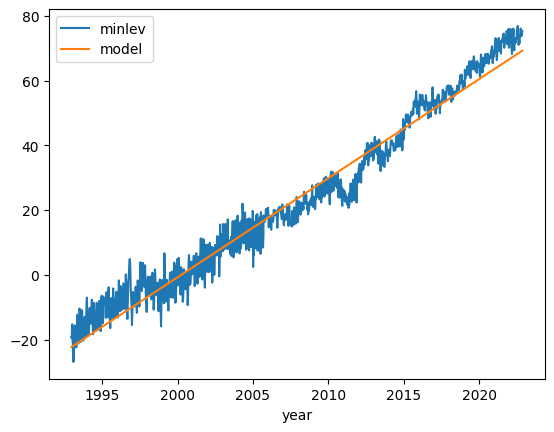

In [72]:
data.plot("year", ["minlev", "model"])

<Axes: xlabel='year'>

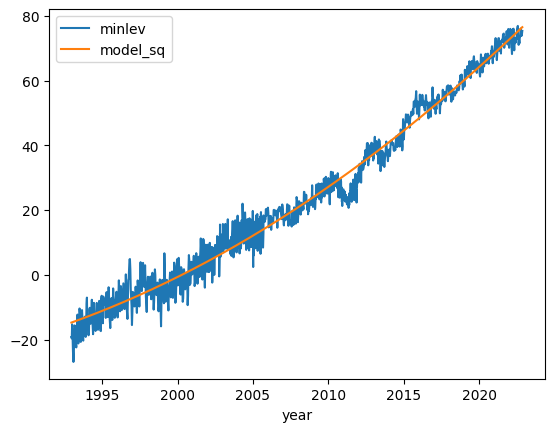

In [73]:
data.plot("year", ["minlev", "model_sq"])

**PROBLEM SOLUTION**

In [39]:
print("change in average global sea level is {0}  mm/yr".format(params[0]))

change in average global sea level is 3.064585893346327  mm/yr
